In [1]:
import sys

In [2]:
!which -a python

/opt/miniconda3/bin/python
/usr/bin/python


In [5]:
!jupyter kernelspec list --json

{
  "kernelspecs": {
    "anaconda-base": {
      "resource_dir": "/Users/pedroecheverri/Library/Jupyter/kernels/anaconda-base",
      "spec": {
        "argv": [
          "/opt/miniconda3/bin/python",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Anaconda(base)",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {
          "debugger": true
        }
      }
    },
    "python3": {
      "resource_dir": "/opt/miniconda3/lib/python3.9/site-packages/ipykernel/resources",
      "spec": {
        "argv": [
          "/opt/miniconda3/bin/python3.9",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Python 3 (ipykernel)",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {
          "debugger": true
        }
      }
   

# EDA (Exploraatory Data Analysis)

In [6]:
# Descargo Paquetes

import pandas as pd
from scipy import stats
import numpy as npzz
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import os
import pickle
import seaborn as sns
from IPython.display import Image
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Encuentro directorio

workingdirectory = os.getcwd()
print(workingdirectory)

/Users/pedroecheverri/Desktop/EAFIT/Semestre 9/Ciencias de los datos/Trabajo/Codigo


In [9]:
# Importación de datos

Datos = pd.read_excel('/Users/pedroecheverri/Desktop/EAFIT/Semestre 9/Ciencias de los datos/Trabajo/Bases de datos/MercadoAgro Mayorista/Precios Mandarina Oneco.xlsx', index_col=0)
Datos.head()

,Promedio de precio mensual mayorista,Volumen Producción mandarina antioquia anual
Fecha,,
2017-01-01,2500,NaN
2017-02-01,3375,NaN
2017-03-01,3075,NaN
2017-04-01,2650,NaN
2017-05-01,2450,NaN


In [10]:
# Defino Variables

Datos.rename(columns = {'Promedio de precio mensual mayorista': 'precio_COP'}, inplace = True)
Datos.head()

,precio_COP,Volumen Producción mandarina antioquia anual
Fecha,,
2017-01-01,2500,NaN
2017-02-01,3375,NaN
2017-03-01,3075,NaN
2017-04-01,2650,NaN
2017-05-01,2450,NaN


## Estadísticas descripitvas

In [11]:
Datos.describe()

,precio_COP,Volumen Producción mandarina antioquia anual
count,55.000000,0.0
mean,2393.872727,NaN
std,691.163326,NaN
min,1100.000000,NaN
25%,2000.000000,NaN
50%,2400.000000,NaN
75%,2900.000000,NaN
max,4000.000000,NaN


# Plots

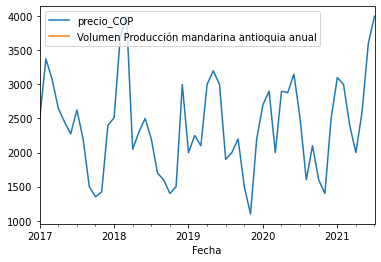

In [12]:
Datos.plot()
plt.show()

In [13]:
precio = Datos['precio_COP']
rolmean = Datos['precio_COP'].rolling(window=12).mean()
rolstd = Datos['precio_COP'].rolling(window=12).std()
mean = Datos['precio_COP'].mean()

In [14]:
data = pd.DataFrame({'precio_COP' : Datos['precio_COP'],
                     'price_spread' : Datos['precio_COP'] - mean, 
                     'rolmean':rolmean,
                     'rolstd': rolstd,
                     'mean':mean,
                     'Var_precio' : np.log(Datos.precio_COP) - np.log(Datos.precio_COP.shift(1))})

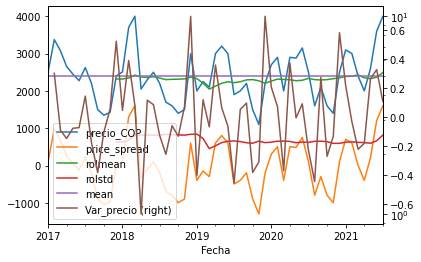

In [15]:
ax = data.plot(secondary_y='Var_precio')
ax2 = ax.twinx()
ax2.set_yscale('log')

plt.show()

In [16]:
data.head()

,precio_COP,price_spread,rolmean,rolstd,mean,Var_precio
Fecha,,,,,,
2017-01-01,2500,106.127273,NaN,NaN,2393.872727,NaN
2017-02-01,3375,981.127273,NaN,NaN,2393.872727,0.300105
2017-03-01,3075,681.127273,NaN,NaN,2393.872727,-0.093090
2017-04-01,2650,256.127273,NaN,NaN,2393.872727,-0.148745
2017-05-01,2450,56.127273,NaN,NaN,2393.872727,-0.078472


## ARIMA

In [17]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

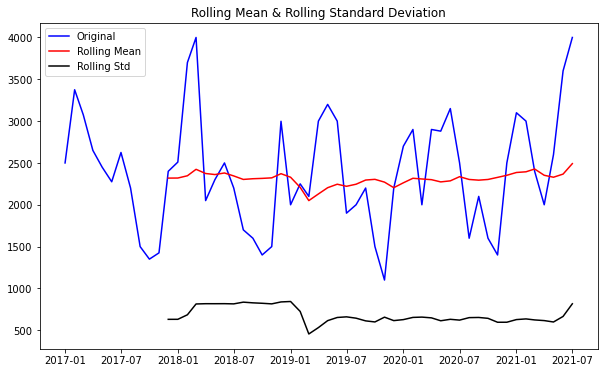

In [18]:
# Importamos datos

df = pd.DataFrame({'precio_COP' : Datos['precio_COP']})
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [19]:
result = adfuller(df['precio_COP'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
    
# P>alpha -> no rechazo Ho: la serie probablemente no es estacionaria y tiene un componente dependiente del tiempo

ADF Statistic: -1.6475714467979532
p-value: 0.4583072930988952
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338


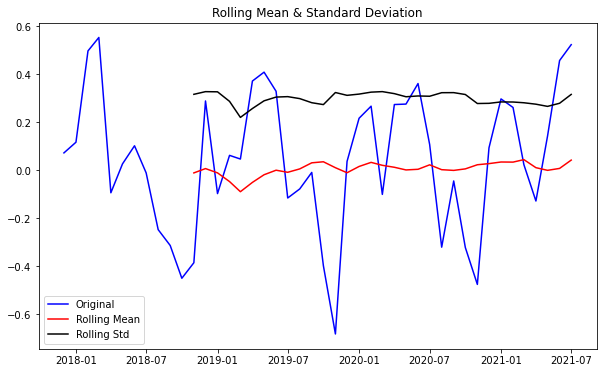

ADF Statistic: -4.088073431075367
p-value: 0.0010134345939409619
Critical Values:
	1%: -3.6461350877925254
	5%: -2.954126991123355
	10%: -2.6159676124885216


In [20]:
# Diferencio la serie

df_log = np.log(df)

# Defino funcion

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['precio_COP'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

/opt/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


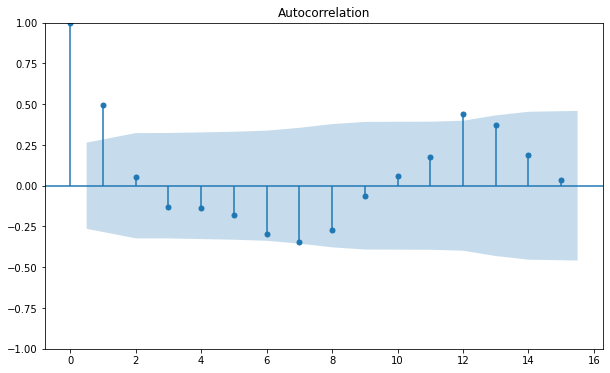

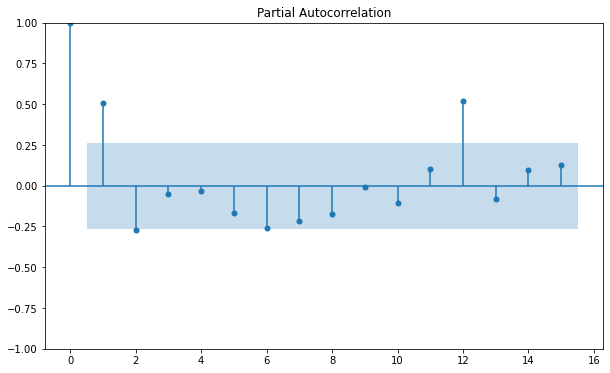

In [29]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(precio.values.squeeze(), lags=15)
sm.graphics.tsa.plot_pacf(precio.values.squeeze(), lags=15)
plt.show()

In [31]:
#Opcion 2

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [32]:
stepwise_fit = auto_arima(data["precio_COP"], trace = True,
                         supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=865.184, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=878.295, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=863.053, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=862.113, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1018.283, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=862.442, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=861.558, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=863.680, Time=0.01 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=863.749, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=865.556, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=932.147, Time=0.05 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.274 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -426.779
Date:                Mon, 15 Nov 2021   AIC                            861.558
Time:                        22:39:52   BIC                            869.587
Sample:                             0   HQIC                           864.663
                                 - 55                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2407.5608    153.507     15.684      0.000    2106.693    2708.428
ma.L1          0.6714      0.132      5.100      0.000       0.413       0.929
ma.L2          0.2418      0.131      1.841      0.066      -0.016       0.499
sigma2       3.19e+05   7.93e+04      4.021      0.000    1.63e+05    4.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.97   Prob(JB):                         0.51
Heteroskedasticity (H):               0.94   Skew:                             0.08
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
print(data.shape)
train = data.iloc[:-12]
test = data.iloc[-12:]
print(train.shape,test.shape)

(55, 6)
(43, 6) (12, 6)


In [46]:
import statsmodels.tsa.arima.model as stats


In [47]:
model = ARIMA(train['precio_COP'], order = (2,1,2))
model=model.fit()
model.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [43]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

NameError: name 'model' is not defined

In [23]:
pred.plot(legend=True)
test['precio_COP'].plot(legend=True)

NameError: name 'pred' is not defined

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred,test['precio_COP']))
print(rmse)



# DONE

NameError: name 'pred' is not defined

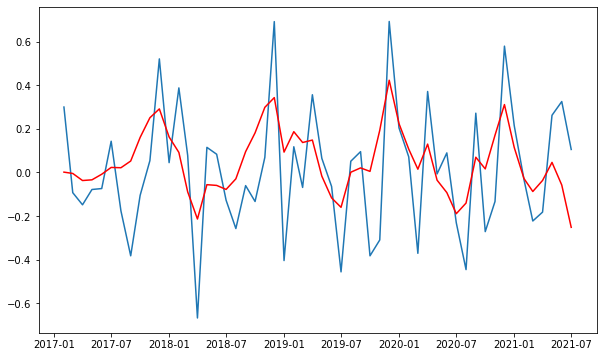

In [62]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)

decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

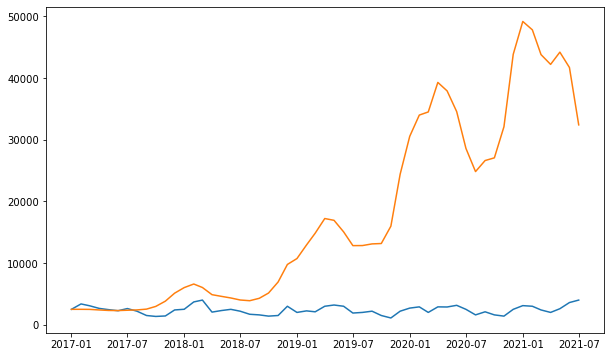

In [63]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['precio_COP'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

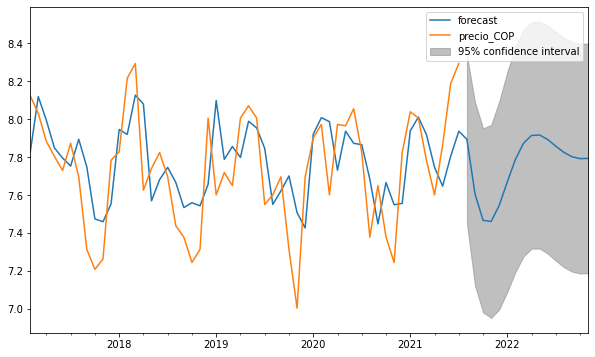

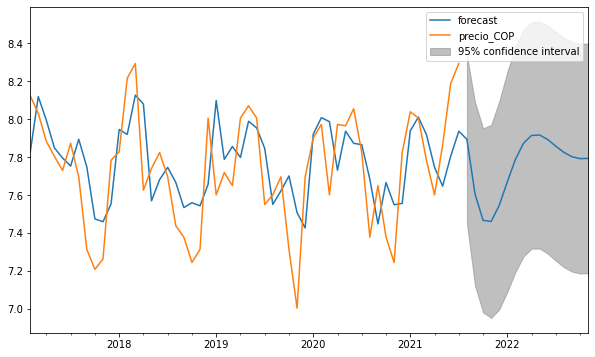

In [49]:
results.plot_predict(1,70)